In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Assuming it's a CSV file, load it into a DataFrame
# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('green_tech_data.csv')

# Display the DataFrame
print(df.head())


Saving green_tech_data.csv to green_tech_data (2).csv
   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [ ]:
df.head()


,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [ ]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [ ]:
#check for missing values
print(df.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


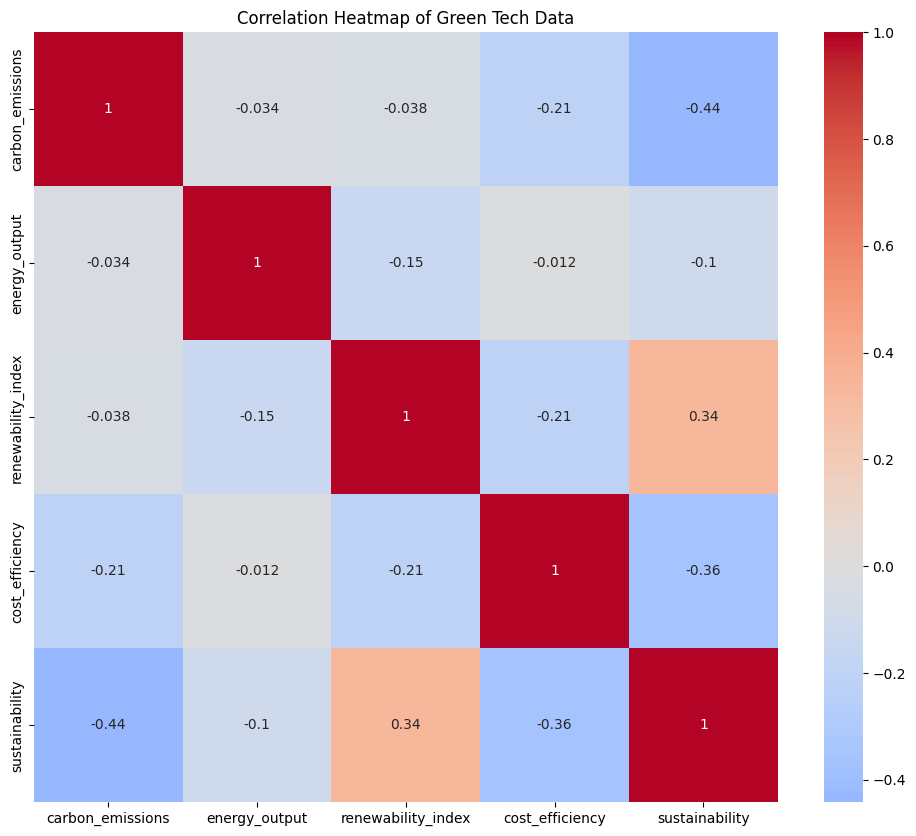

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Green Tech Data')
plt.show()

In [ ]:
#  X (independent variable)
x = df[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
#  y (dependent variable)
y = df['sustainability']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

In [ ]:
x_train.head()

,carbon_emissions,renewability_index,cost_efficiency
49,114.699059,0.853009,3.316370
34,387.971212,0.195243,0.707012
7,353.161651,0.663502,1.953304
95,222.828459,0.522243,4.688408
27,229.982053,0.393098,3.252743


In [ ]:
#create a linear regression model
model = LogisticRegression()
#train the model
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#make predictions on test set
y_pred = model.predict(x_test)

In [ ]:
#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.95


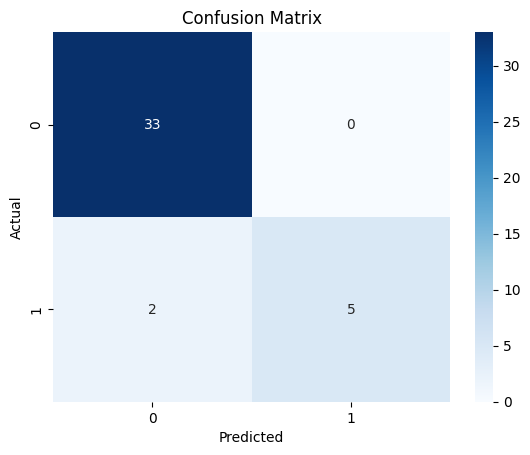

In [ ]:
#confusion matrix
conf_names = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_names, annot=True, fmt='d', cmap='Blues')
xticklelabels=['Not Sustainable', 'Sustainable']
yticklabels=['Not Sustainable', 'Sustainable']
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

sustainability
0    85
1    15
Name: count, dtype: int64


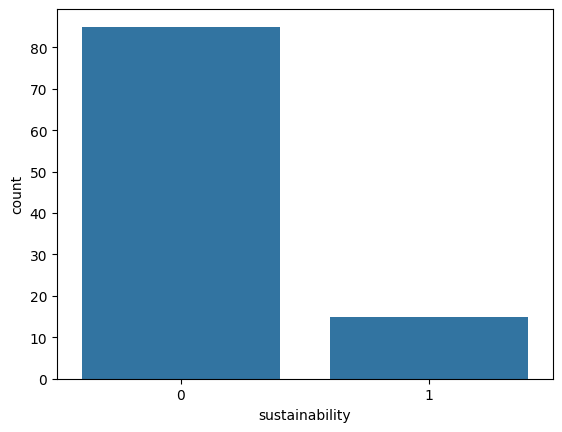

In [ ]:
#check if data is balanced or not as we previously did df.head()

# Check for class imbalance
print(df['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=df)
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, y_pred, target_names = ['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [ ]:
# Feature importance
coefficients = pd.DataFrame(model.coef_.T, index=x.columns, columns=['Coefficients'])
print(coefficients)

                    Coefficients
carbon_emissions       -0.017791
renewability_index      0.712932
cost_efficiency        -1.230857


In [ ]:
# save the model to a file
import joblib
joblib.dump(model, 'lrmodel_sustainability.pkl')

['lrmodel_sustainability.pkl']